In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
# Convert to a Pandas DataFrame
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target

# Explore the dataset
print(cancer_df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
cancer_df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
cancer_df.duplicated().sum()

0

In [ ]:
cancer_df.corr()
#

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [ ]:
num_cancer_df = cancer_df.select_dtypes(include=[np.number])
num_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
num_cancer_df.skew()

,0
mean radius,0.942380
mean texture,0.650450
mean perimeter,0.990650
mean area,1.645732
mean smoothness,0.456324
mean compactness,1.190123
mean concavity,1.401180
mean concave points,1.171180
mean symmetry,0.725609
mean fractal dimension,1.304489


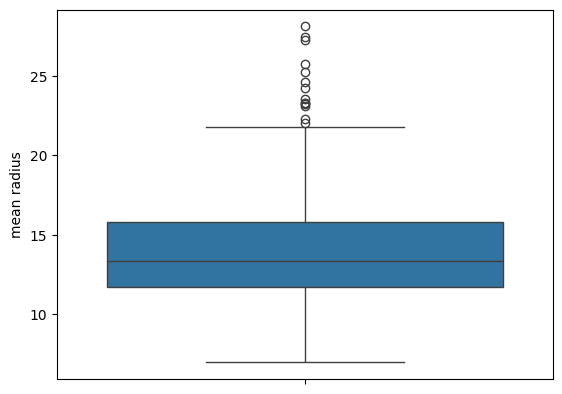

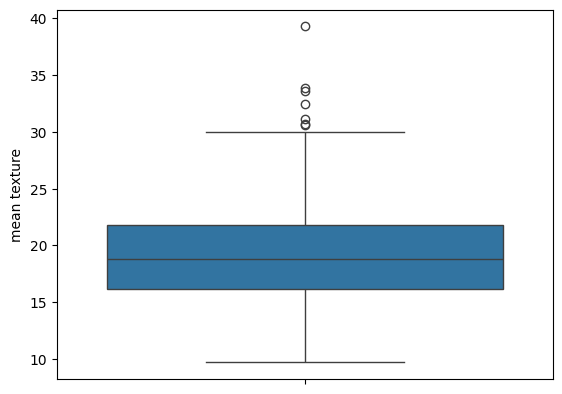

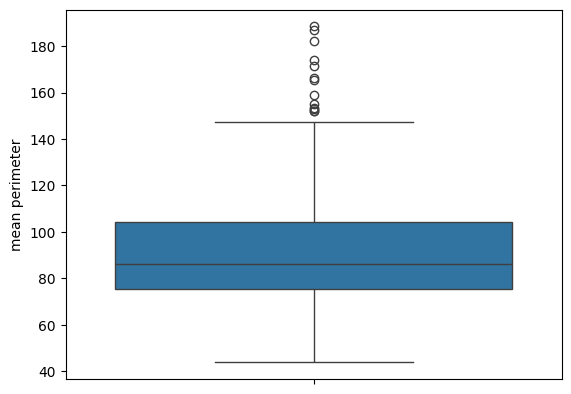

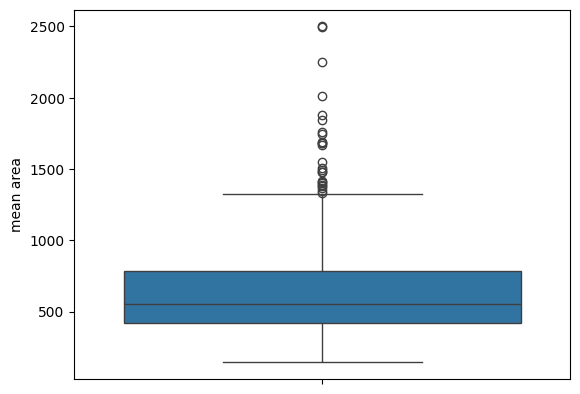

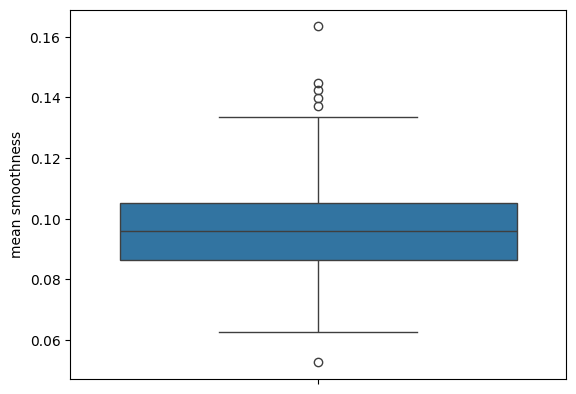

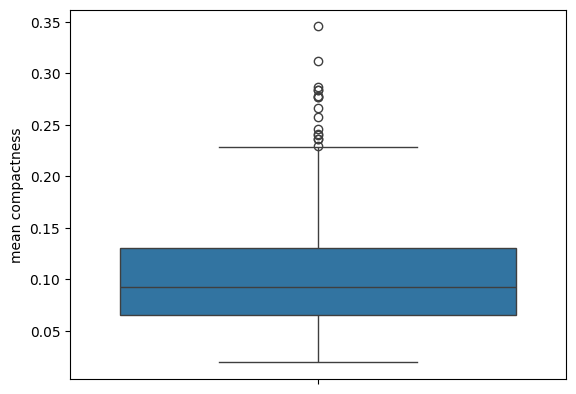

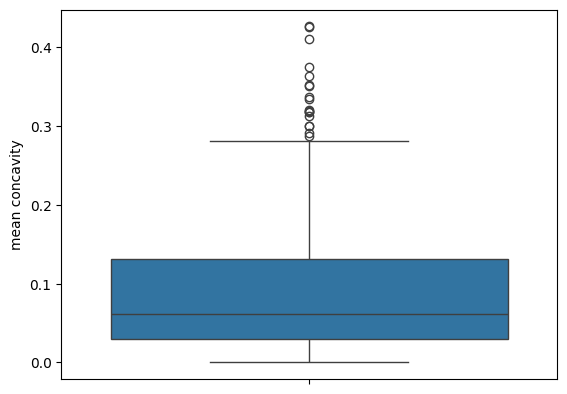

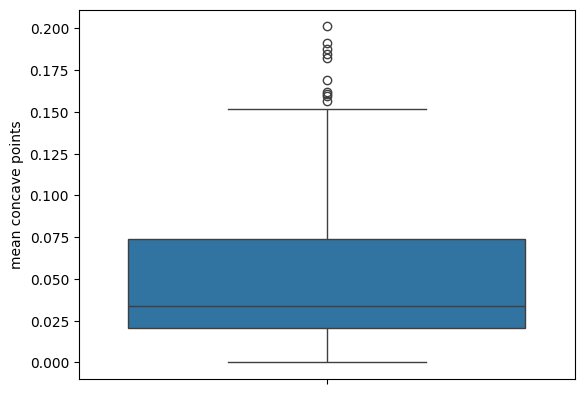

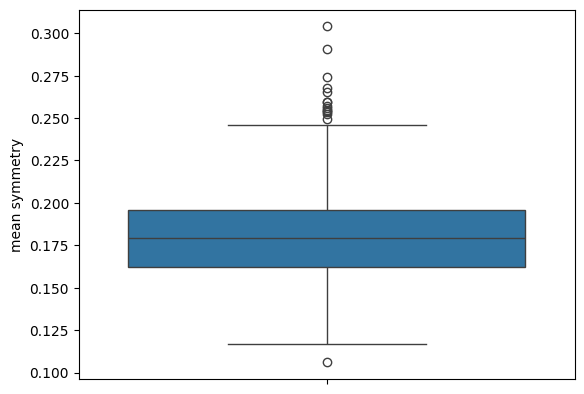

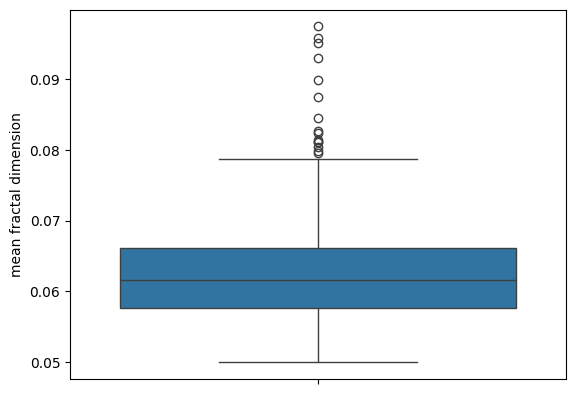

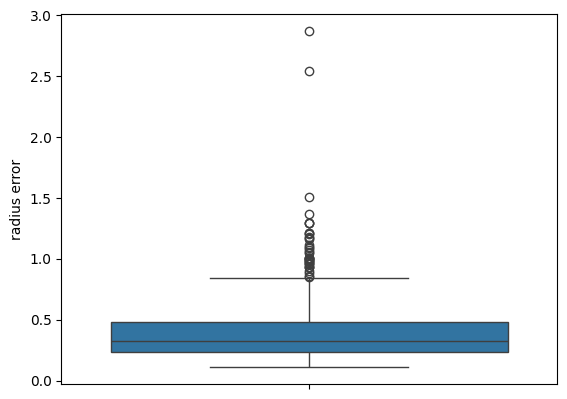

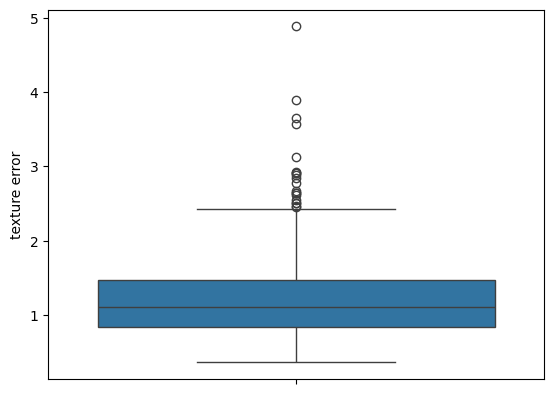

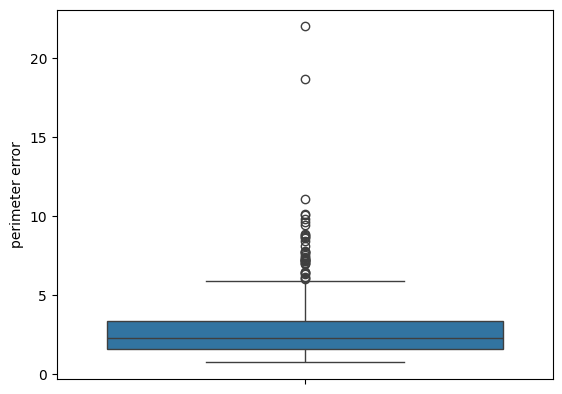

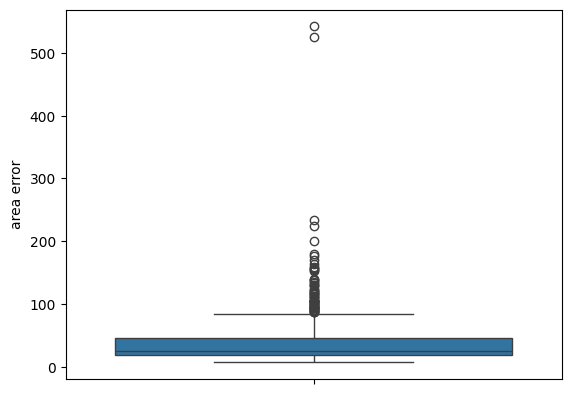

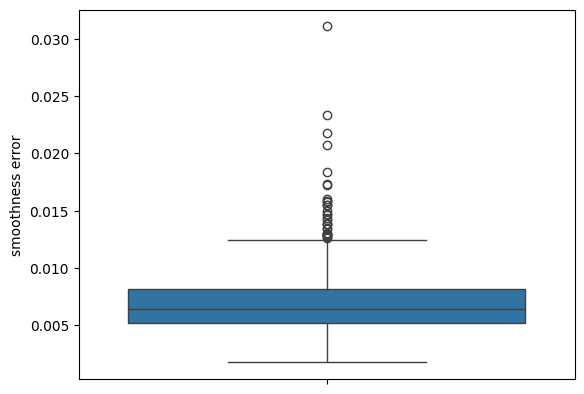

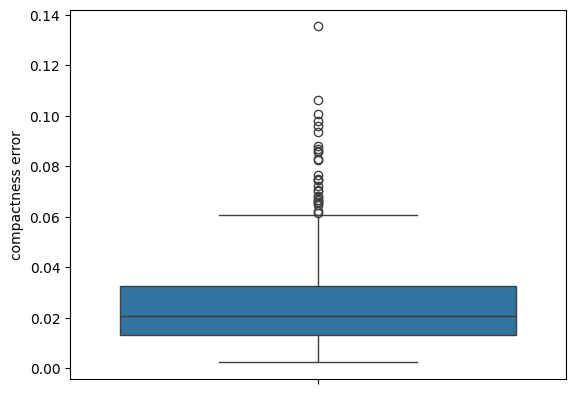

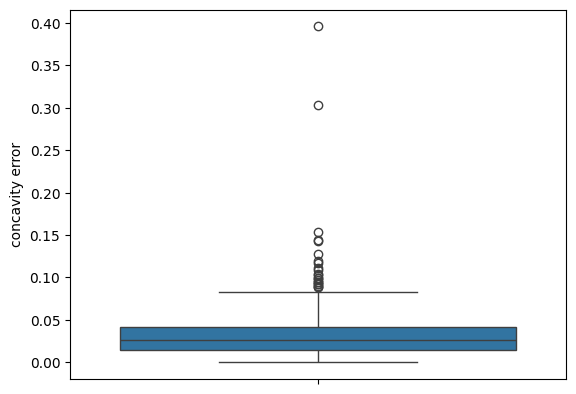

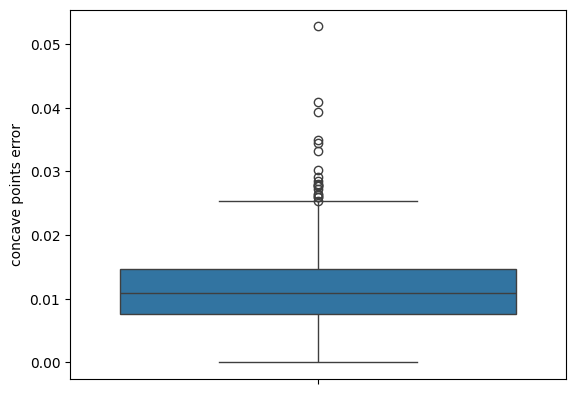

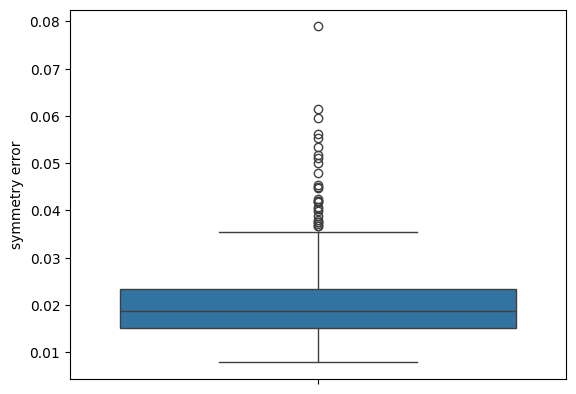

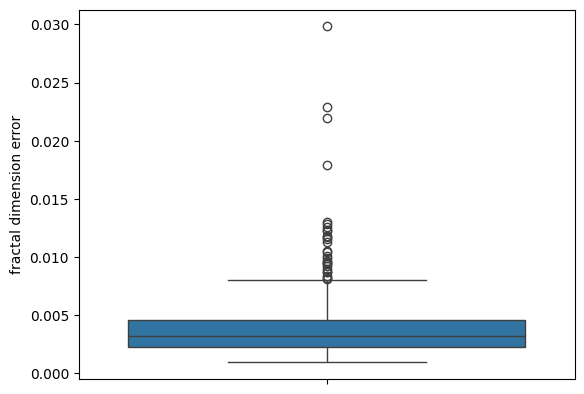

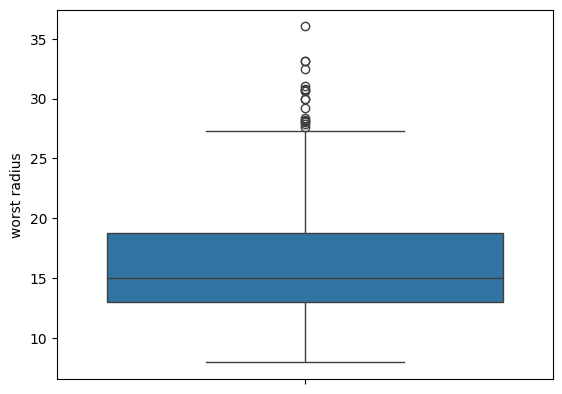

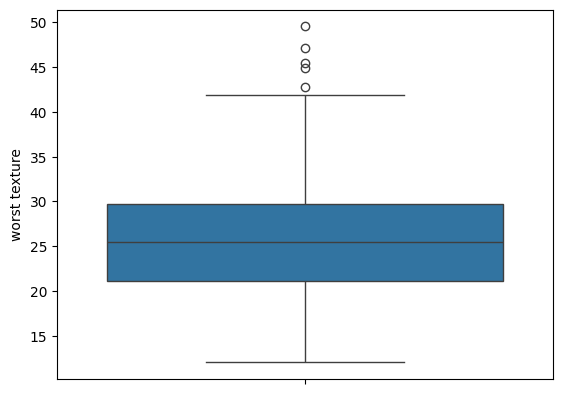

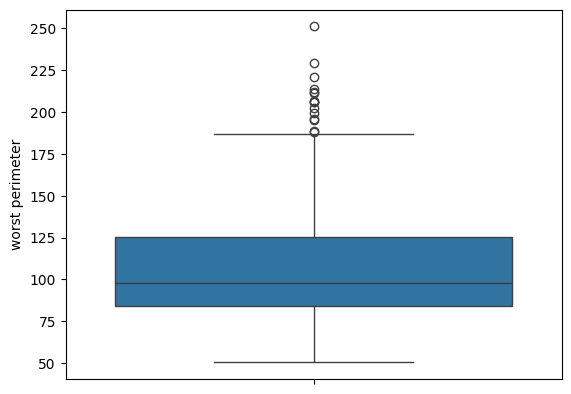

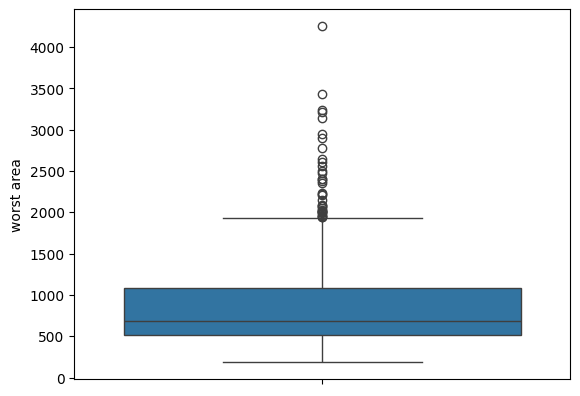

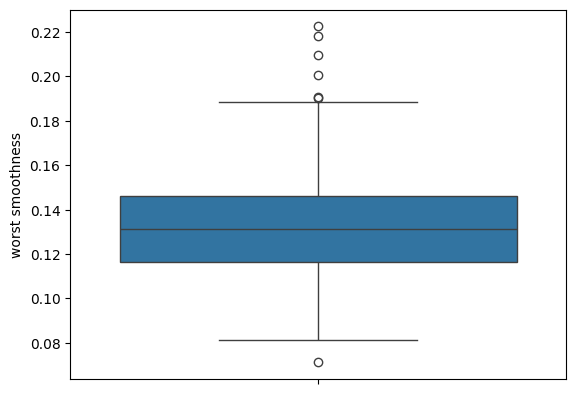

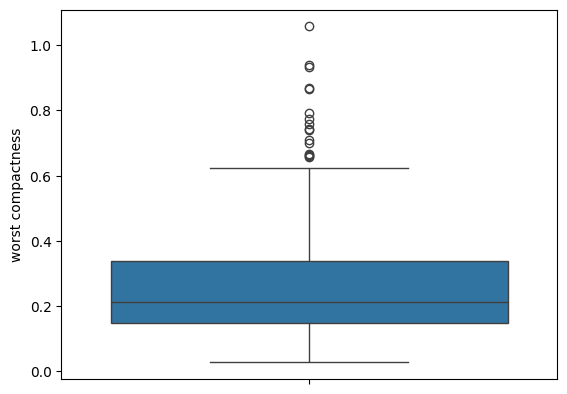

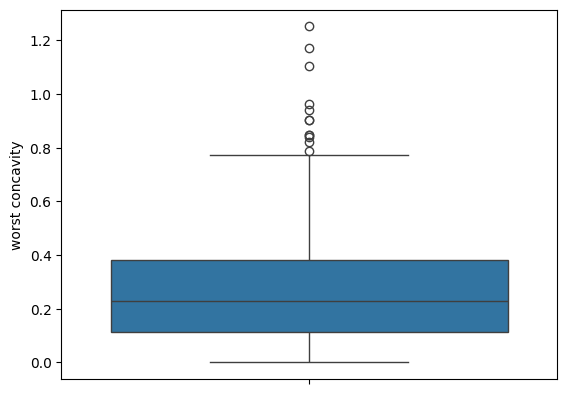

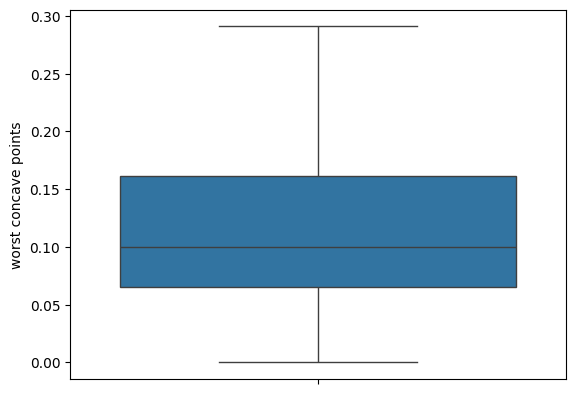

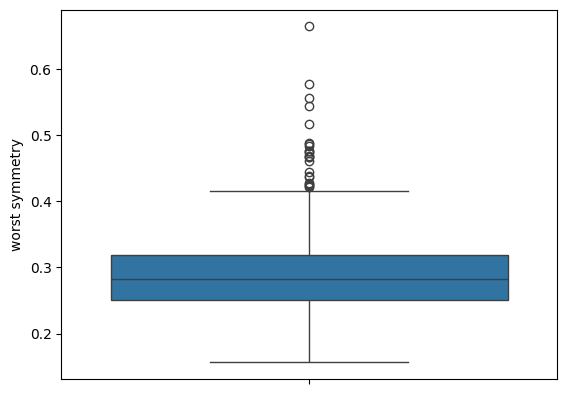

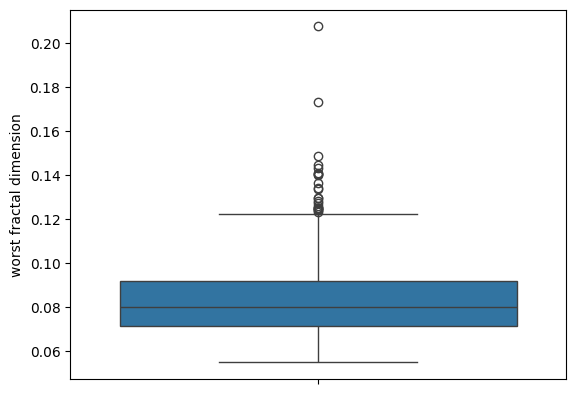

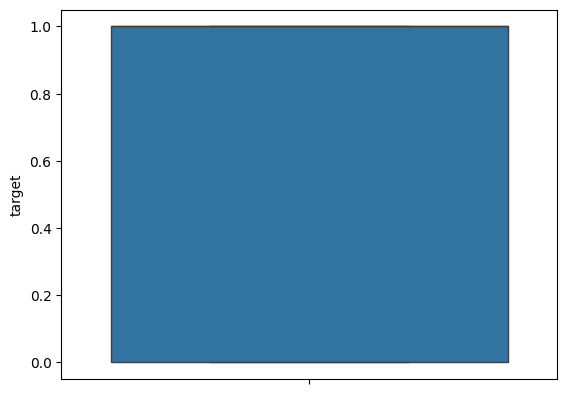

In [ ]:
for i in cancer_df.columns:
 sns.boxplot(cancer_df[i])
 plt.show()

In [ ]:
for column in cancer_df.select_dtypes("number").columns:
    Q1 = cancer_df[column].quantile(0.25)
    Q3 = cancer_df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = cancer_df[(cancer_df[column] >= Q1 - 1 * IQR) & (cancer_df[column] <= Q3 + 1 * IQR)]

cancer_df.to_csv('cleaned_cancerdata.csv', index=False)

In [ ]:
df = pd.read_csv("cleaned_cancerdata.csv")
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.skew()

,0
mean radius,0.942380
mean texture,0.650450
mean perimeter,0.990650
mean area,1.645732
mean smoothness,0.456324
mean compactness,1.190123
mean concavity,1.401180
mean concave points,1.171180
mean symmetry,0.725609
mean fractal dimension,1.304489


In [ ]:
from scipy import stats

for column in df.select_dtypes("number").columns:
    if df[column].skew() > 0.8:
        df[column], _ = stats.boxcox(df[column] + 1)  # Adding 1 to handle non-positive values



Preprocessing of data is necessary to give correct prediction. Duplicated data, null values and outliers are checked to reduce the error in prediction.



In [ ]:
df.skew()

,0
mean radius,0.008176
mean texture,0.650450
mean perimeter,0.007262
mean area,0.005204
mean smoothness,0.456324
mean compactness,0.105564
mean concavity,0.223924
mean concave points,0.198740
mean symmetry,0.725609
mean fractal dimension,0.036216


In [ ]:
nu_df = df.select_dtypes("number")
nu_df.skew()

,0
mean radius,0.008176
mean texture,0.650450
mean perimeter,0.007262
mean area,0.005204
mean smoothness,0.456324
mean compactness,0.105564
mean concavity,0.223924
mean concave points,0.198740
mean symmetry,0.725609
mean fractal dimension,0.036216


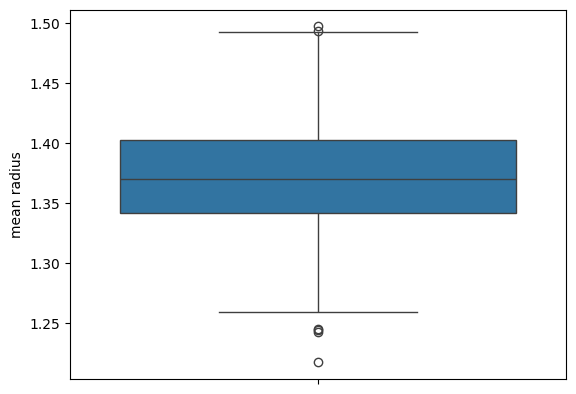

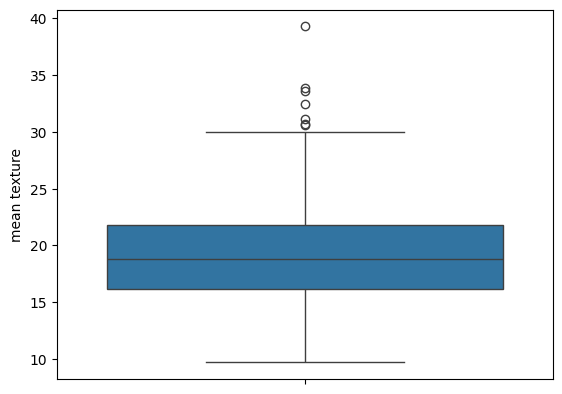

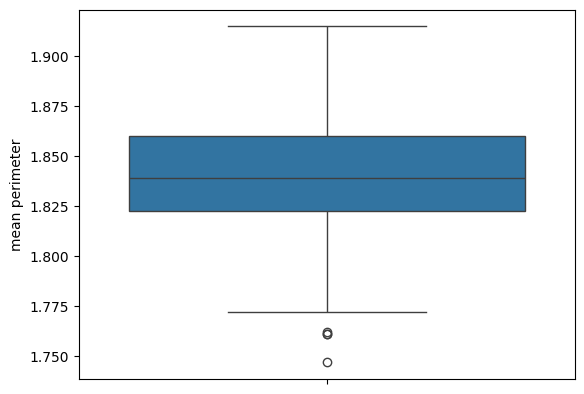

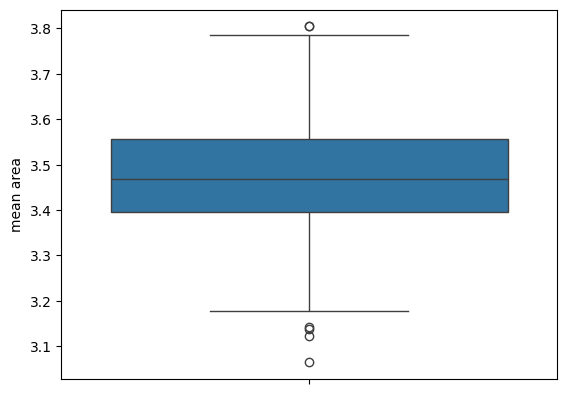

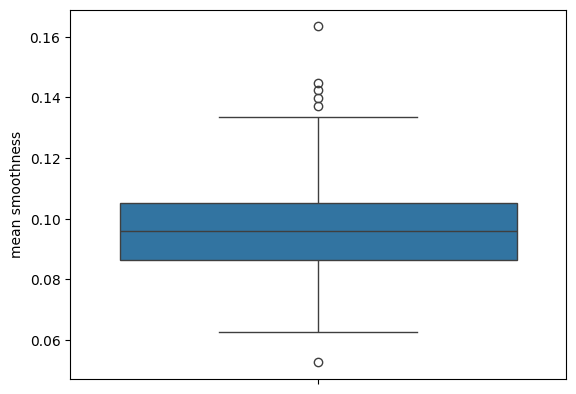

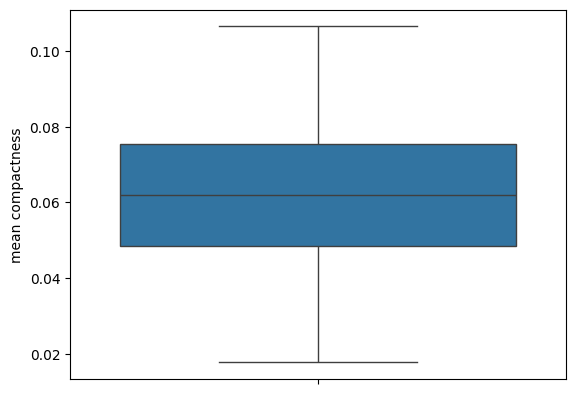

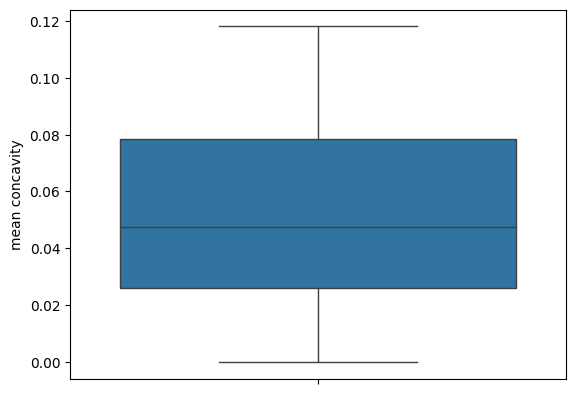

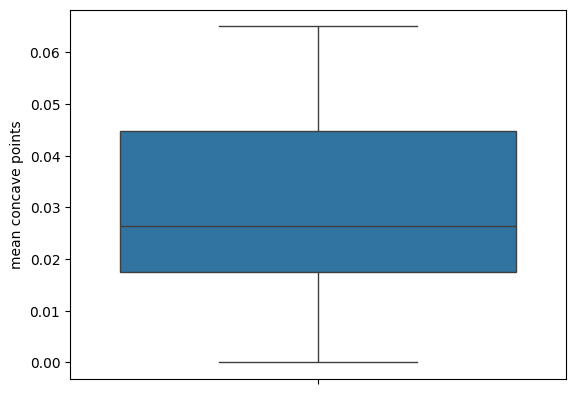

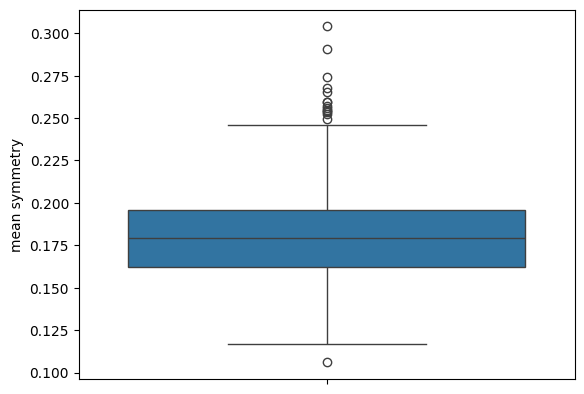

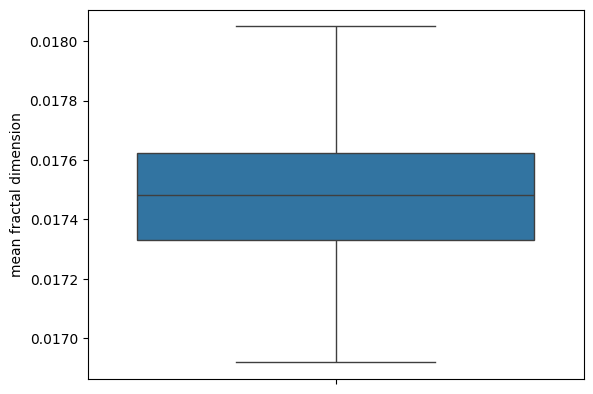

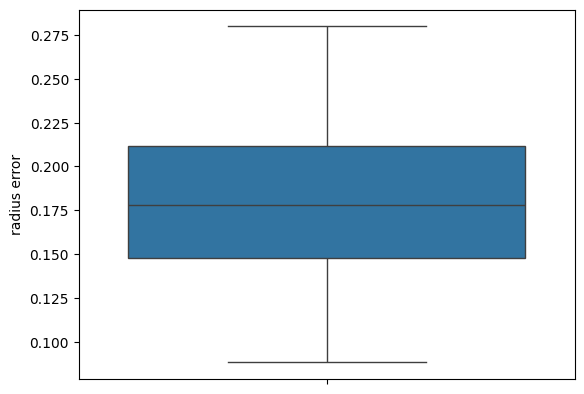

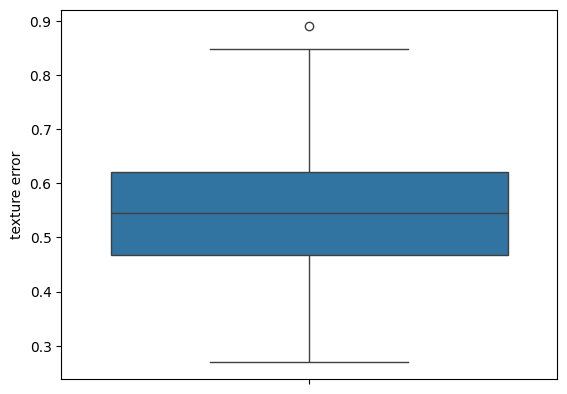

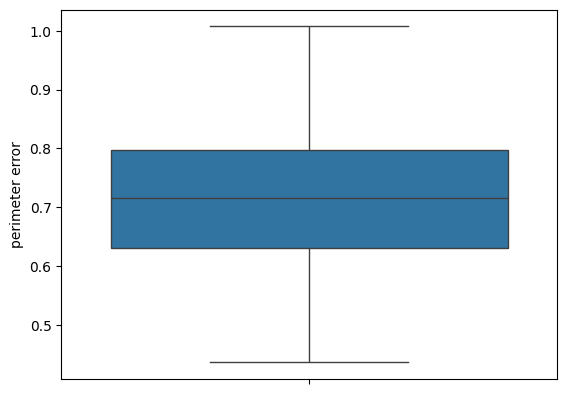

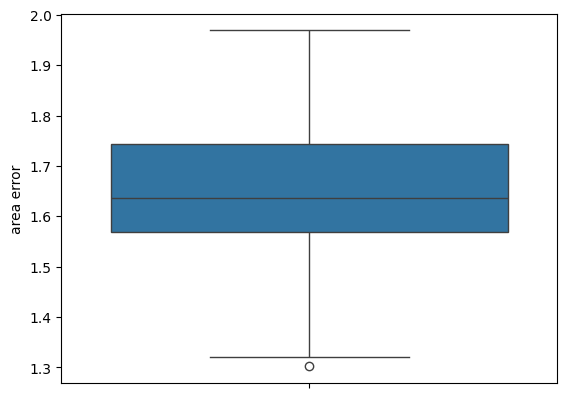

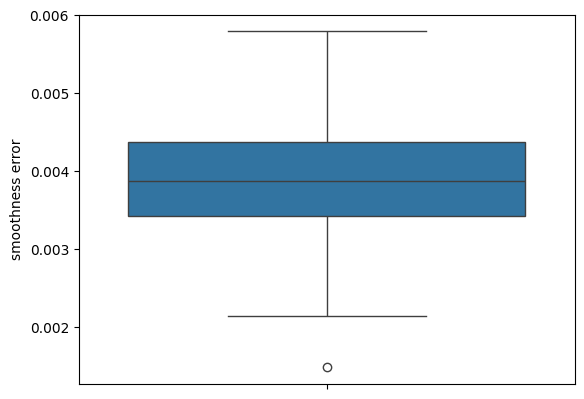

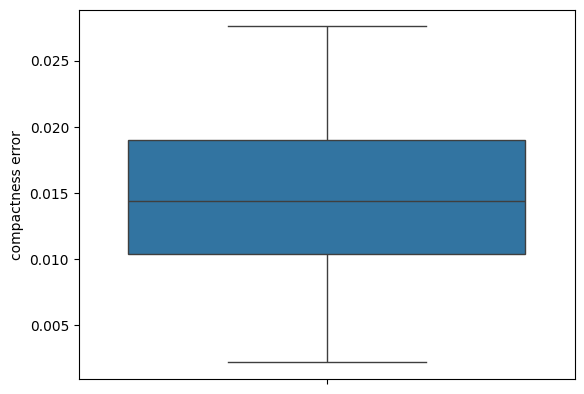

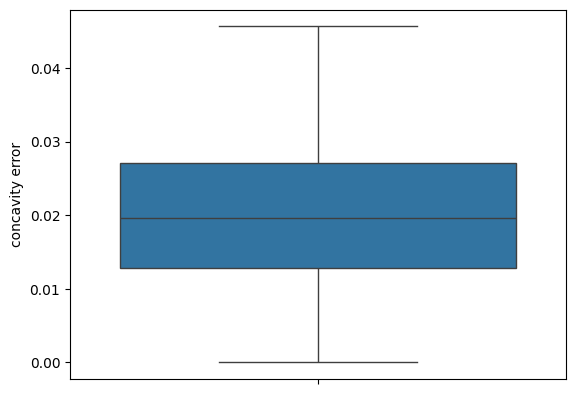

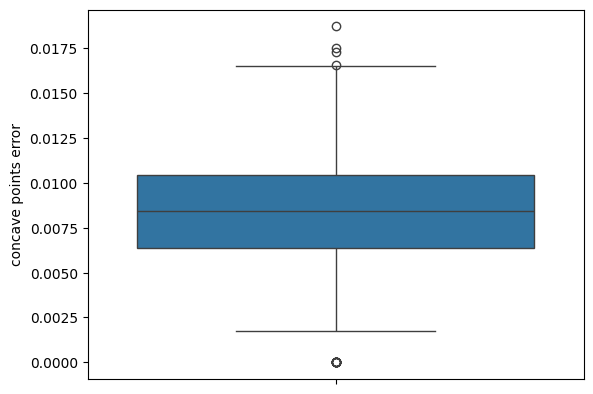

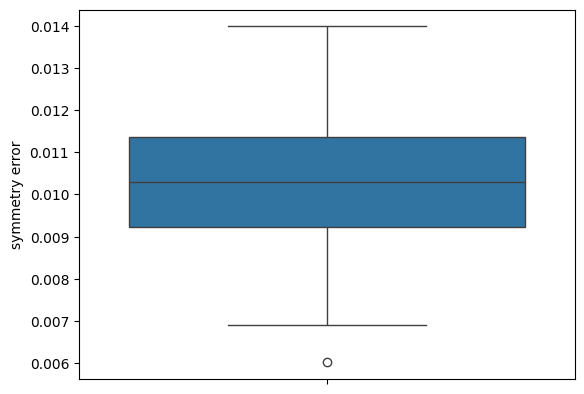

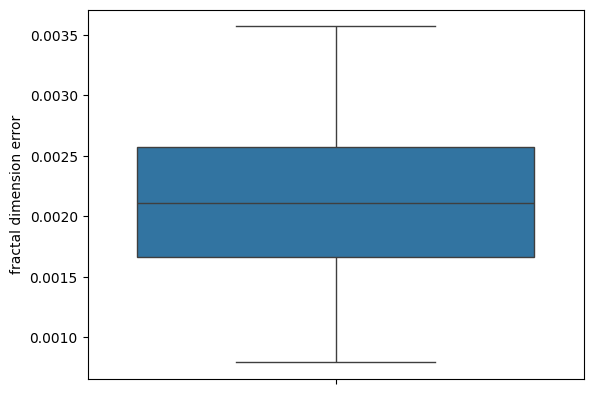

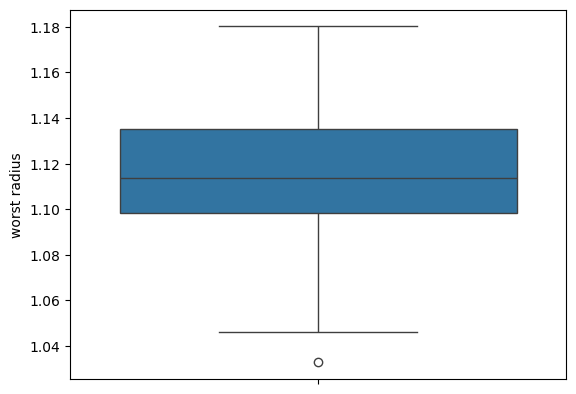

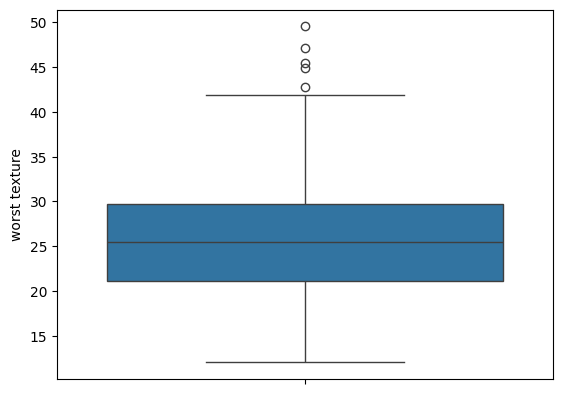

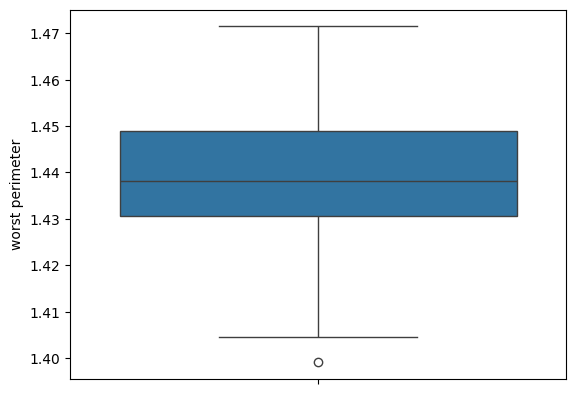

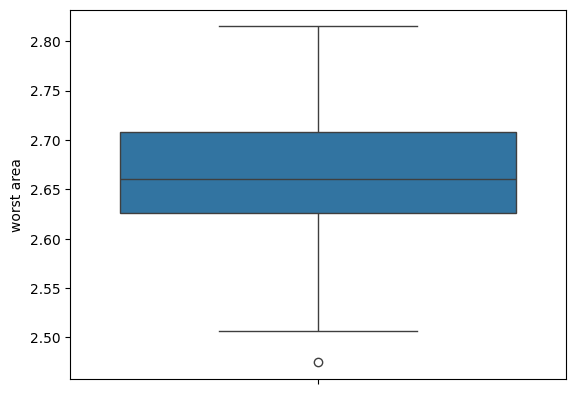

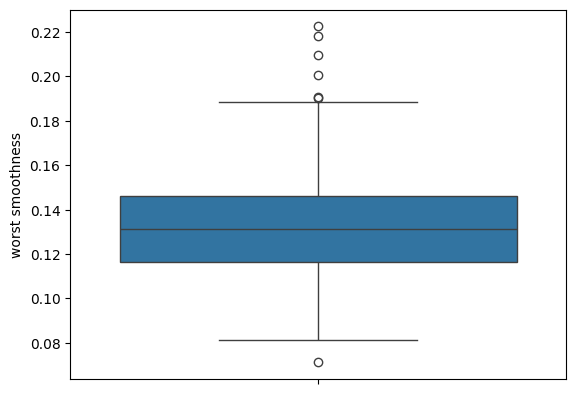

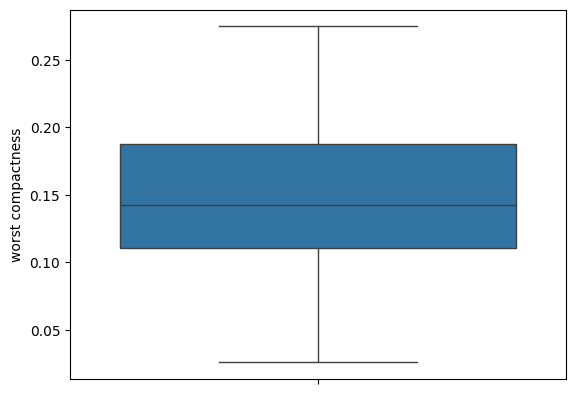

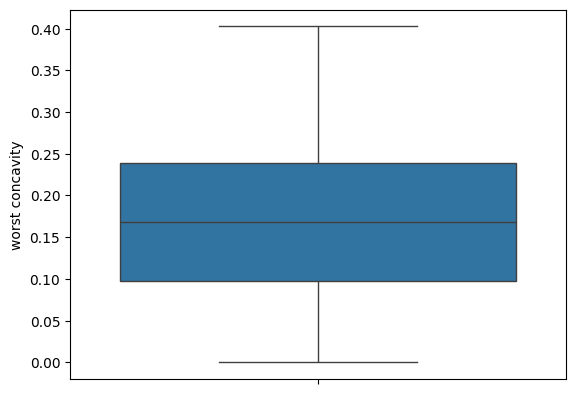

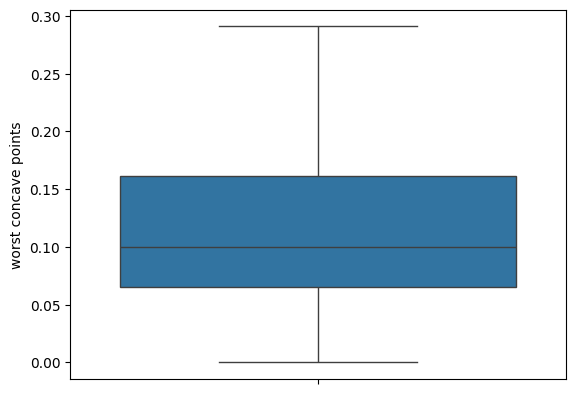

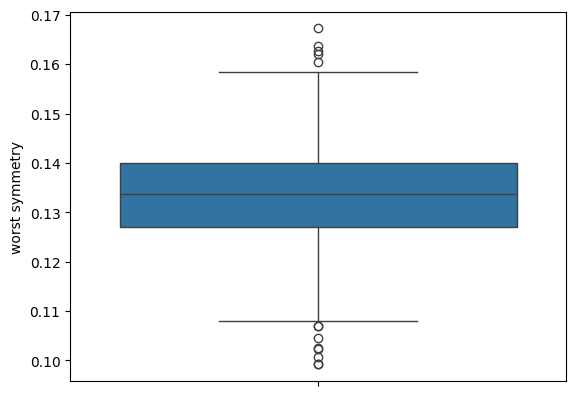

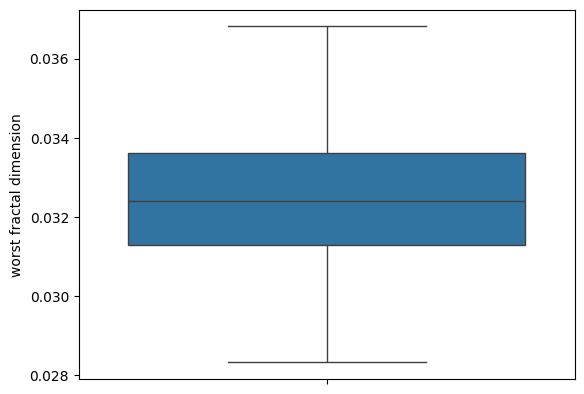

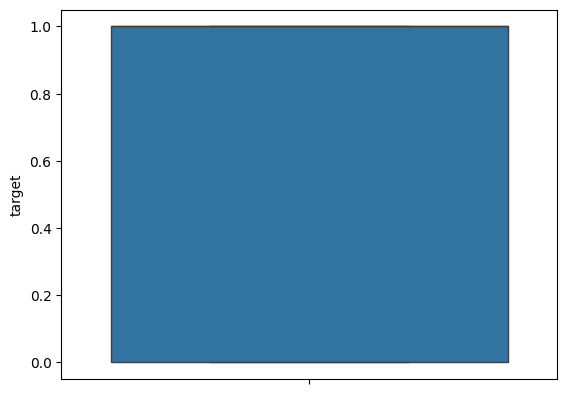

In [ ]:
for i in nu_df.columns:
 sns.boxplot(nu_df[i])
 plt.show()

In [ ]:
x = df.drop('target', axis=1)
y = df['target']

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [ ]:
x_scaled=StandardScaler().fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

1.  **LOGISTIC REGRESSION**

In [ ]:

LogReg = LogisticRegression()

LogReg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_prediction=LogReg.predict(x_test)

In [ ]:
y_prediction

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
y_test

,target
410,1
481,1
218,0
353,0
365,0
...,...
336,1
188,1
34,0
367,1


<Axes: >

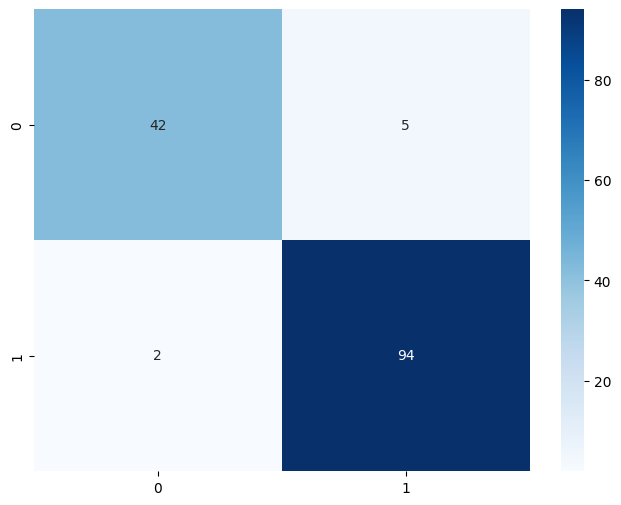

In [ ]:
confusion_matrix(y_test, y_prediction)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt='d', cmap='Blues')

In [ ]:
confusion_matrix(y_test, y_prediction)

array([[42,  5],
       [ 2, 94]])

The confusion matrix of the given prection shows that the logistic regression model is highly accurate, that is it is correctly classifying 59 instances as class 0 and 80 instances as class 1. There are only 4 misclassifications: 2 instances were incorrectly predicted as class 1 when they were actually class 0 (false positives), and 2 instances were incorrectly predicted as class 0 when they were actually class 1 (false negatives). This minimal error rate indicates that the model is very reliable in distinguishing between the two classes.

In [ ]:
cr = classification_report(y_test, y_prediction)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.95      0.98      0.96        96

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.94       143
weighted avg       0.95      0.95      0.95       143



The model prediction made over the train data are compared with the actual target, and the predictions of this model logistic regression is evaluated using the classification report.
The classification report indicates that the logistic regression model is performing exceptionally well, with an overall accuracy of 95%. For class 0,
the model achieves a precision of 0.95, recall of 0.89, and an F1-score of 0.92, suggesting it accurately identifies most instances of class 0 but misses a few.
For class 1, the precision is 0.95, recall is 0.98, and the F1-score is 0.96, demonstrating that the model is highly effective at correctly classifying class 1 instances.
The macro and weighted averages for precision, recall, and F1-score are all around 0.95, reflecting a balanced performance across both classes.
This comprehensive analysis confirms that the model is both accurate and reliable, effectively distinguishing between the two classes with minimal errors.

In [ ]:
Accuracyscore=accuracy_score(y_test, y_prediction)
print("Accuracy Score:")
print(Accuracyscore)

Accuracy Score:
0.951048951048951


An accuracy score of 0.95  indicates that the logistic regression model
correctly classified about 95% of the instances in your dataset. A score of 95% suggests that the model is performing well, accurately predicting the majority of the labels in your dataset.


---



2. **DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier()
DC.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_preddc = DC.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_preddc)

array([[44,  3],
       [ 9, 87]])

<Axes: >

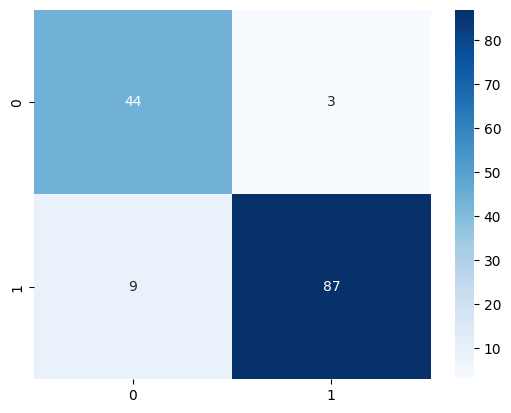

In [ ]:
confusion_matrix(y_test, y_preddc)
sns.heatmap(confusion_matrix(y_test, y_preddc), annot=True, fmt='d', cmap='Blues')

As per the Decision tree classifier model prediction, The confusion matrix [[44, 3], [9, 87]] shows the model's classification results: it correctly identified 44 positive cases and 87 negative cases. However, it misclassified 3 negative cases as positive (False Positives) and 9 positive cases as negative (False Negatives). This matrix reflects the model’s performance, with the majority of predictions being accurate but some errors in distinguishing between the classes.

In [ ]:
classification_report(y_test, y_preddc)
print("Classification Report:")
print(classification_report(y_test, y_preddc))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        47
           1       0.97      0.91      0.94        96

    accuracy                           0.92       143
   macro avg       0.90      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143



The classification report shows the Decision Tree Classifier model performs effectively, with an overall accuracy of 92%. For class 0, it achieves a precision of 0.83, recall of 0.94, and F1-score of 0.88. For class 1, it excels with a precision of 0.97, recall of 0.91, and F1-score of 0.94. The macro average precision 0.91, recall 0.92, and F1-score are 0.91, indicating balanced performance across classes, while the weighted averages are all 0.92, reflecting strong performance adjusted for class imbalances.

In [ ]:
Accuracyscore=accuracy_score(y_test, y_preddc)
print("Accuracy Score:")
print(Accuracyscore)

Accuracy Score:
0.916083916083916


An accuracy score of 0.916, or approximately 91.6%, indicates that the Decision Tree Classifier model correctly classified 91.6% of all instances in the dataset. This high accuracy suggests that the model performs well overall, effectively distinguishing between classes with minimal errors. This score reflects a reliable and effective model for the classification task, with a small proportion of misclassified instances relative to the total.

3. # RANDOM FOREST CLASSIFIER


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc =RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_predrfc=rfc.predict(x_test)

In [ ]:
Accuracyscore=accuracy_score(y_test, y_predrfc)
print("Accuracy Score:")
print(Accuracyscore)

Accuracy Score:
0.965034965034965



An accuracy score of 0.965, or approximately 96.5%, for the Random Forest Classifier model indicates that it correctly classified 96.5% of the instances in the dataset. This high accuracy suggests that the model is performing exceptionally well, effectively distinguishing between classes with very few errors. The Random Forest Classifier’s strong performance reflects its ability to handle complex datasets and capture intricate patterns, leading to a highly reliable classification outcome.

<Axes: >

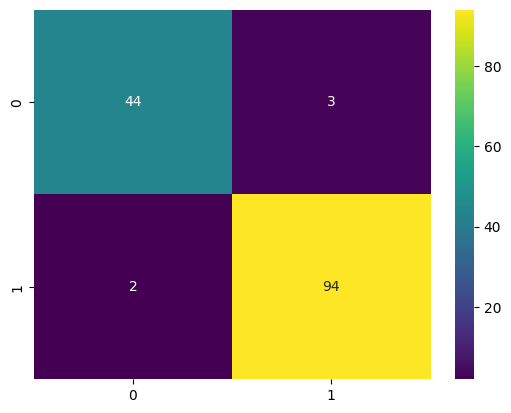

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predrfc), annot=True, fmt='d', cmap="viridis")

In [ ]:
confusion_matrix(y_test, y_predrfc)

array([[44,  3],
       [ 2, 94]])

The array [[44, 3], [2, 94]] is a confusion matrix that shows the performance of a classification model. It indicates that the model correctly predicted 44 positive cases (True Positives) and 94 negative cases (True Negatives). However, it made 3 incorrect positive predictions (False Positives) and 2 incorrect negative predictions (False Negatives). This matrix is used to evaluate the accuracy and other metrics of the model.

In [ ]:
cr = classification_report(y_test, y_predrfc)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.97      0.98      0.97        96

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



The classification report shows that the Random Forest Classifier performs very well, achieving an overall accuracy of 96%. For class 0, the model has a precision of 0.96, recall of 0.94, and an F1-score of 0.95, indicating balanced performance in identifying class 0. For class 1, it excels with a precision of 0.97, recall of 0.98, and an F1-score of 0.97, reflecting strong classification for class 1. The macro averages, which provide the average performance across both classes, are 0.97 for precision, recall, and F1-score, while the weighted averages, taking into account class imbalances, are all 0.96. This overall performance highlights the model’s high reliability and effectiveness in distinguishing between classes.

# 4. Support Vector Machine (SVM)


In [ ]:
from sklearn.svm import SVC

In [ ]:
svmmodel = SVC()
svmmodel.fit(x_train, y_train)
y_svmpred = svmmodel.predict(x_test)

In [ ]:
Accuracyscore=accuracy_score(y_test, y_svmpred)
print("Accuracy Score:")
print(Accuracyscore)

Accuracy Score:
0.7482517482517482


An accuracy score of 0.748, or approximately 74.8%, for the Support Vector Machine (SVM) model indicates that the model correctly classified 74.8% of the instances in the dataset. While this reflects a moderate level of performance, it suggests that there is room for improvement. The SVM model is performing better than random guessing but not as effectively as the Random Forest Classifier in this case.

<Axes: >

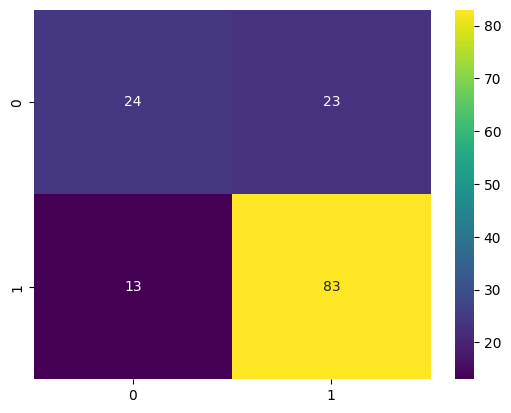

In [ ]:
confusion_matrix(y_test, y_svmpred)
sns.heatmap(confusion_matrix(y_test, y_svmpred), annot=True, fmt='d', cmap="viridis")

In [ ]:
confusion_matrix(y_test, y_svmpred)

array([[24, 23],
       [13, 83]])

The SVM model, with the confusion matrix [[24, 23], [13, 83]] represents the performance of an SVM model. It shows that the model correctly identified 24 instances as the positive class and 83 instances as the negative class. However, it also made some mistakes: it incorrectly classified 23 negative instances as positive (False Positives) and 13 positive instances as negative (False Negatives). This matrix provides insight into the model's accuracy and helps evaluate how well the SVM model distinguishes between the two classes.






In [ ]:
cr = classification_report(y_test, y_svmpred)
print("Classification Report:")
print(cr)


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.51      0.57        47
           1       0.78      0.86      0.82        96

    accuracy                           0.75       143
   macro avg       0.72      0.69      0.70       143
weighted avg       0.74      0.75      0.74       143




The classification report for the Support Vector Machine (SVM) model shows an accuracy of 75%, with notable performance differences between classes. For class 0, the model has a precision of 0.65, recall of 0.51, and an F1-score of 0.57, indicating moderate performance with room for improvement. For class 1, the model performs better with a precision of 0.78, recall of 0.86, and an F1-score of 0.82, reflecting stronger classification. The macro averages are 0.72 for precision, recall, and F1-score, showing balanced but moderate performance across classes, while the weighted averages of 0.74 for precision, 0.75 for recall, and 0.74 for F1-score, adjusted for class distribution, suggest better overall effectiveness but still highlight areas for enhancement.

# 5. k-Nearest Neighbors (k-NN)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier()

# Fit the model to your training data
knn.fit(x_train, y_train)

# Make predictions
y_pred_knn = knn.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy Score: {accuracy:.3f}')


Accuracy Score: 0.818


The KNN model achieved an accuracy of  81.8% of the instances in the dataset. In other words, out of all the predictions the model made, 81.8% matched the actual labels. This accuracy score reflects the model's overall effectiveness in classifying the data correctly, with the remaining 18.2% representing the cases where the model made incorrect predictions.








In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[31 16]
 [10 86]]


The confusion matrix [[31, 16], [10, 86]] shows the model's performance, where it correctly classified 31 positive cases and 86 negative cases. However, it made some errors, incorrectly labeling 16 negative cases as positive and 10 positive cases as negative. This gives a snapshot of the model's ability to distinguish between the two classes, highlighting both its strengths and areas for improvement.

In [ ]:
class_report = classification_report(y_test, y_pred_knn)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        47
           1       0.84      0.90      0.87        96

    accuracy                           0.82       143
   macro avg       0.80      0.78      0.79       143
weighted avg       0.81      0.82      0.81       143



KNN model's classification report shows an accuracy of 82%. It performs better on class 1 with a precision of 84%, recall of 90%, and an F1-score of 87%, indicating stronger performance for this class. However, for class 0, the precision is lower at 76%, with a recall of 66% and an F1-score of 70%, showing weaker performance. The overall metrics suggest the model is more effective at predicting class 1 than class 0, leading to an average but not optimal performance across both classes.

Among all the models consider Random forest classifier found to have the highest prediction accuracy of about 96%. For the present DATA ramdom classifier model appears to be the best model. SVM model performed the least.